In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_states_daily = pd.read_json("https://covidtracking.com/api/us/daily")
df_states_daily['dateChecked'] = df_states_daily['dateChecked'].astype('datetime64[ns]')

In [3]:
df_states_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      31 non-null     int64         
 1   states                    31 non-null     int64         
 2   positive                  31 non-null     int64         
 3   negative                  31 non-null     int64         
 4   pending                   31 non-null     int64         
 5   hospitalizedCurrently     10 non-null     float64       
 6   hospitalizedCumulative    14 non-null     float64       
 7   inIcuCurrently            9 non-null      float64       
 8   inIcuCumulative           10 non-null     float64       
 9   onVentilatorCurrently     10 non-null     float64       
 10  onVentilatorCumulative    10 non-null     float64       
 11  recovered                 10 non-null     float64       
 12  hash                    

In [4]:
df_states_daily.head(5)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200403,56,271915,1135356,61980,19926.0,35991.0,4686.0,593.0,70.0,...,6962,35991.0,1469251,1407271,1407271,1178.0,3342.0,106707.0,32906.0,139613.0
1,20200402,56,239009,1028649,62101,17157.0,32649.0,4264.0,541.0,67.0,...,5784,32649.0,1329759,1267658,1267658,1084.0,1507.0,89459.0,28239.0,117698.0
2,20200401,56,210770,939190,59669,16223.0,31142.0,3837.0,4270.0,71.0,...,4700,31142.0,1209629,1149960,1149960,954.0,4482.0,74989.0,26087.0,101076.0
3,20200331,56,184683,864201,59518,14236.0,26660.0,3402.0,3644.0,69.0,...,3746,26660.0,1108402,1048884,1048884,807.0,4357.0,79877.0,24153.0,104030.0
4,20200330,56,160530,784324,65369,12147.0,22303.0,2982.0,3177.0,259.0,...,2939,22303.0,1010223,944854,944854,511.0,2902.0,92034.0,21469.0,113503.0


In [5]:
min_date = (df_states_daily.dateChecked.min()).date()
max_date = (df_states_daily.dateChecked.max()).date()

max_states = df_states_daily.states.max()

In [6]:
import yfinance as yf

In [25]:
# Microsoft
tick_msft = yf.Ticker("MSFT")
df_msft = tick_msft.history(
    start=min_date,
    end=max_date)
msft_pct = df_msft.Open.pct_change()

print(df_msft.head(5))

# df_msft.info()
# print(df_msft.index)


# Zoom
tick_zm = yf.Ticker("ZM")
df_zm = tick_zm.history(
    start=min_date,
    end=max_date)

zm_pct = df_zm.Open.pct_change()

print( zm_pct )


# Dow Jones Industrial Average
df_dji = yf.Ticker("DJI").history(
    start=min_date,
    end=max_date)

dji_pct = df_dji.Open.pct_change()

              Open    High     Low   Close    Volume  Dividends  Stock Splits
Date                                                                         
2020-03-04  168.49  170.70  165.62  170.55  49814400          0             0
2020-03-05  166.05  170.87  165.69  166.27  47817300          0             0
2020-03-06  162.61  163.11  156.00  161.57  72821100          0             0
2020-03-09  151.00  157.75  150.00  150.62  70419300          0             0
2020-03-10  158.16  161.03  152.58  160.92  65354400          0             0
Date
2020-03-04         NaN
2020-03-05   -0.069699
2020-03-06    0.085261
2020-03-09   -0.122440
2020-03-10    0.083810
2020-03-11   -0.047364
2020-03-12   -0.019924
2020-03-13    0.063529
2020-03-16   -0.070796
2020-03-17    0.022190
2020-03-18    0.034194
2020-03-19    0.107658
2020-03-20    0.049207
2020-03-23    0.100775
2020-03-24    0.084507
2020-03-25   -0.090260
2020-03-26    0.002926
2020-03-27    0.036937
2020-03-30    0.103363
2020-03-31  

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

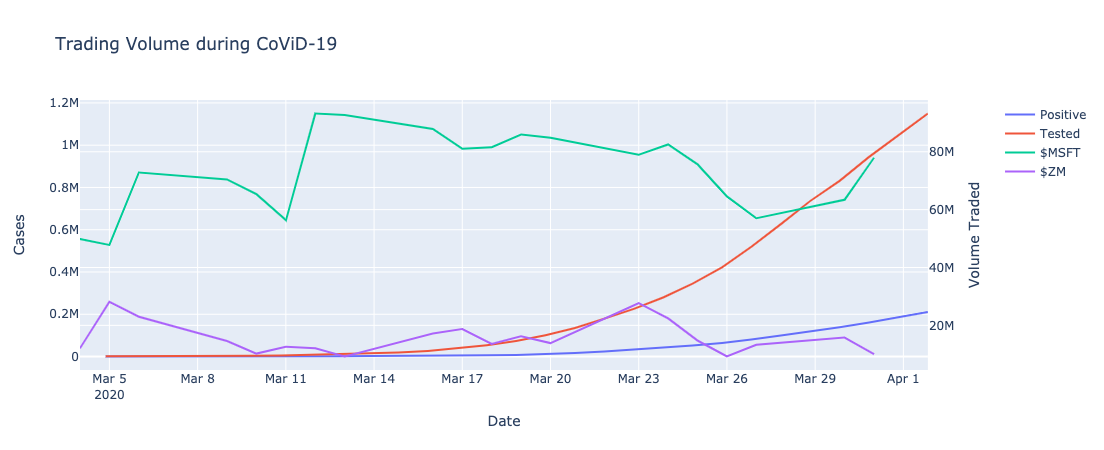

In [68]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Positive COVID-19 cases
fig.add_trace(go.Scatter(x=df_states_daily['dateChecked'], y=df_states_daily['positive'],
                    mode='lines',
                    name='Positive'),
             secondary_y=False)

# Total tested cases
fig.add_trace(go.Scatter(x=df_states_daily['dateChecked'], y=df_states_daily['totalTestResults'],
                    mode='lines',
                    name='Tested'),
             secondary_y=False,)

# MSFT Volumne
fig.add_trace(go.Scatter(x=df_msft.index, y=df_msft['Volume'],
                    mode='lines',
                    name='$MSFT'),
             secondary_y=True,)

# ZM Volumne
fig.add_trace(go.Scatter(x=df_zm.index, y=df_zm['Volume'],
                    mode='lines',
                    name='$ZM'),
             secondary_y=True,)



# Add figure title
fig.update_layout(
    title_text="Trading Volume during CoViD-19"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Cases", secondary_y=False)
fig.update_yaxes(title_text="Volume Traded", secondary_y=True)



fig.show()

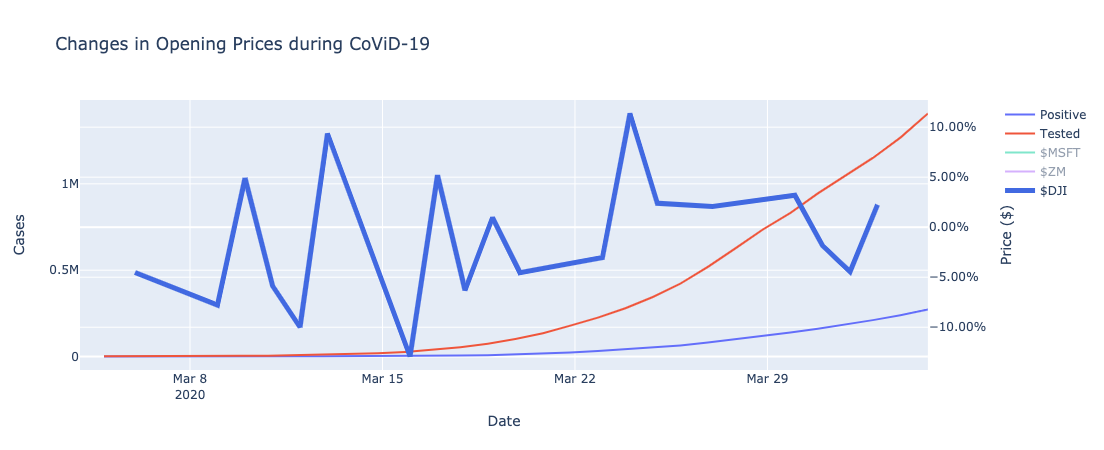

In [29]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Positive COVID-19 cases
fig.add_trace(go.Scatter(x=df_states_daily['dateChecked'], y=df_states_daily['positive'],
                    mode='lines',
                    name='Positive'),
             secondary_y=False)

# Total tested cases
fig.add_trace(go.Scatter(x=df_states_daily['dateChecked'], y=df_states_daily['totalTestResults'],
                    mode='lines',
                    name='Tested'),
             secondary_y=False,)

# MSFT Open
fig.add_trace(go.Scatter(x=msft_pct.index, y=msft_pct,
                    mode='lines',
                    name='$MSFT',
                    visible='legendonly'),
             secondary_y=True,)

# ZM Open
fig.add_trace(go.Scatter(x=zm_pct.index, y=zm_pct,
                    mode='lines',
                    name='$ZM',
                    visible='legendonly'),
             secondary_y=True,)

# DJI Open
fig.add_trace(go.Scatter(x=dji_pct.index, y=dji_pct,
                    mode='lines',
                    name='$DJI',
                    line=dict(color='royalblue', width=5)),
             secondary_y=True,)



# Add figure title
fig.update_layout(
    title_text="Changes in Opening Prices during CoViD-19",
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Cases", secondary_y=False)
fig.update_yaxes(title_text="Price ($)", secondary_y=True)

# Set second y axis to percentage
fig.update_yaxes(tickformat=".2%", secondary_y=True)



fig.show()